In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np

import cmbo
from IPython.display import display

from plot_cluster import *

%load_ext autoreload
%autoreload 2

/Users/rstiskalek/Projects/CMBOlympics/venv_cmbo/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
fname_cmb = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00.fits"
cmb_tsz = cmbo.io.read_Planck_comptonSZ(fname_cmb)
cmb_tsz = cmbo.utils.smooth_map_gaussian(cmb_tsz, fwhm_arcmin=9.6, )


fname_clusters = "/Users/rstiskalek/Projects/CMBOlympics/data/observed_cluster_masses.toml"
obs_clusters = cmbo.io.load_observed_clusters(fname_clusters)

fname_rand_pointing = "/Users/rstiskalek/Projects/CMBOlympics/data/COM_CompMap_Compton-SZMap-nilc-ymaps_2048_R2.00_RAND_POINTING.hdf5"
theta_rand, tsz_rand_signal, theta_rand_bg, tsz_rand_background = cmbo.io.read_from_hdf5(
    fname_rand_pointing, "theta_rand", "tsz_rand_signal", "theta_rand_bg", "tsz_rand_background",)

In [3]:
profiler = cmbo.corr.PointingEnclosedProfile(cmb_tsz, fwhm_arcmin=9.6)
profiler2d = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

In [4]:
profiler2d.find_centers_observed_clusters(obs_clusters)
theta = np.linspace(0.1, 600, 301)  # arcmin
profiler.compute_profiles_observed_clusters(obs_clusters, theta)

Processing Abell 1644 (1/19)...
  Input: (304.878, 45.450)
  Peak:  (304.965, 45.449)
  Offset: 5.17 arcmin
Processing Abell 119 (2/19)...
  Input: (125.714, -64.062)
  Peak:  (125.674, -64.122)
  Offset: 4.30 arcmin
Processing Abell 548 (3/19)...
  Input: (230.287, -24.817)
  Peak:  (230.289, -24.473)
  Offset: 20.66 arcmin
Processing Abell 1736 (4/19)...
  Input: (312.569, 35.024)
  Peak:  (312.607, 35.031)
  Offset: 2.33 arcmin
Processing Abell 496 (5/19)...
  Input: (209.585, -36.485)
  Peak:  (209.544, -36.525)
  Offset: 3.44 arcmin
Processing Hydra (A1060) (6/19)...
  Input: (269.596, 26.488)
  Peak:  (269.571, 26.477)
  Offset: 1.66 arcmin
Processing Centaurus (A3526) (7/19)...
  Input: (302.399, 21.561)
  Peak:  (302.364, 21.605)
  Offset: 3.34 arcmin
Processing Hercules (A2199) (8/19)...
  Input: (62.931, 43.694)
  Peak:  (62.922, 43.670)
  Offset: 1.52 arcmin
Processing Hercules (A2147) (9/19)...
  Input: (28.970, 44.535)
  Peak:  (29.012, 44.537)
  Offset: 2.49 arcmin
Proces

Computing profiles: 100%|██████████| 19/19 [00:13<00:00,  1.41it/s]


In [26]:
# fname = "../data/csiborg2_fof.hdf5"
fname = "../data/manticore_fof.hdf5"


# optional_keys = ["R200c", ]
optional_keys = ["Group_R_Crit200", ]

positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    fname, "Coordinates", "Group_M_Crit200", optional_keys=optional_keys)

# positions, masses, optional_data = cmbo.io.load_halo_positions_masses(
    # fname, "Position", "M200c", optional_keys=optional_keys)

# boxsize = 677.7
# boxsize = 676.6
boxsize = 681.0

associations = cmbo.utils.identify_halo_associations(positions, masses, optional_data=optional_data)
pval, dist = cmbo.utils.compute_matching_matrix(obs_clusters, associations, boxsize)
matches = cmbo.utils.greedy_global_matching(pval, dist, obs_clusters, associations, 0.05)

100%|██████████| 537/537 [00:02<00:00, 203.80it/s]

Cluster 17 (Shapley (A3562)) now orphaned (best remaining p=9.659e-02)
Cluster 10 (Hercules (A2151)) now orphaned (best remaining p=1.932e-01)


In [27]:
k = 15

print(obs_clusters.names[k])

assoc, min_pval, d = matches[k]

print(f"p-value: {min_pval:.3e}, distance: {d:.2f} Mpc")

# obs_pos = np.full((3,), 676.6 / 2)
obs_pos = np.full((3,), boxsize / 2)
r, ell, b = assoc.to_galactic_angular(obs_pos)
rc, ellc, bc = assoc.centroid_to_galactic_angular(obs_pos)
theta200 = np.rad2deg(np.atan(assoc.optional_data["Group_R_Crit200"] / r)) * 60


Shapley (A3571)
p-value: 2.082e-03, distance: 4.92 Mpc


In [28]:
obs = obs_clusters[k]
print(obs.galactic_coordinates)
print(obs.map_fit["ell"], obs.map_fit["b"])

(316.3196983753959, 28.561106515543813)
316.2942961682229 28.527767755450697


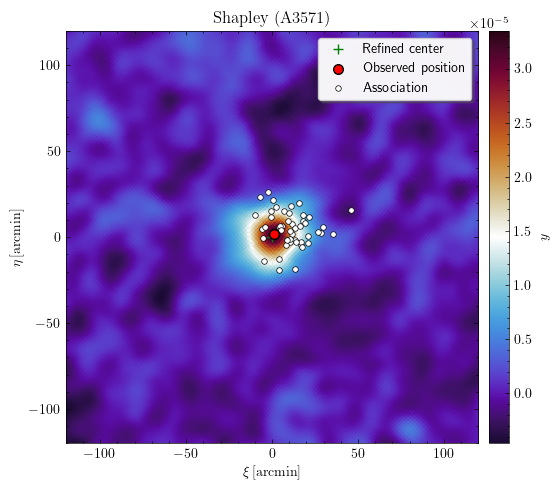

In [29]:
fig, ax = plot_observed_cluster_cutout(
    obs_clusters[k],
    association=assoc,
    obs_pos=obs_pos,
    zoom_arcmin=None)

# fig.savefig(f"Manticore_Coma.png", dpi=150)
display(fig)

Plotting 17/19 matched clusters
Skipping 2 unmatched: ['Hercules (A2151)', 'Shapley (A3562)']


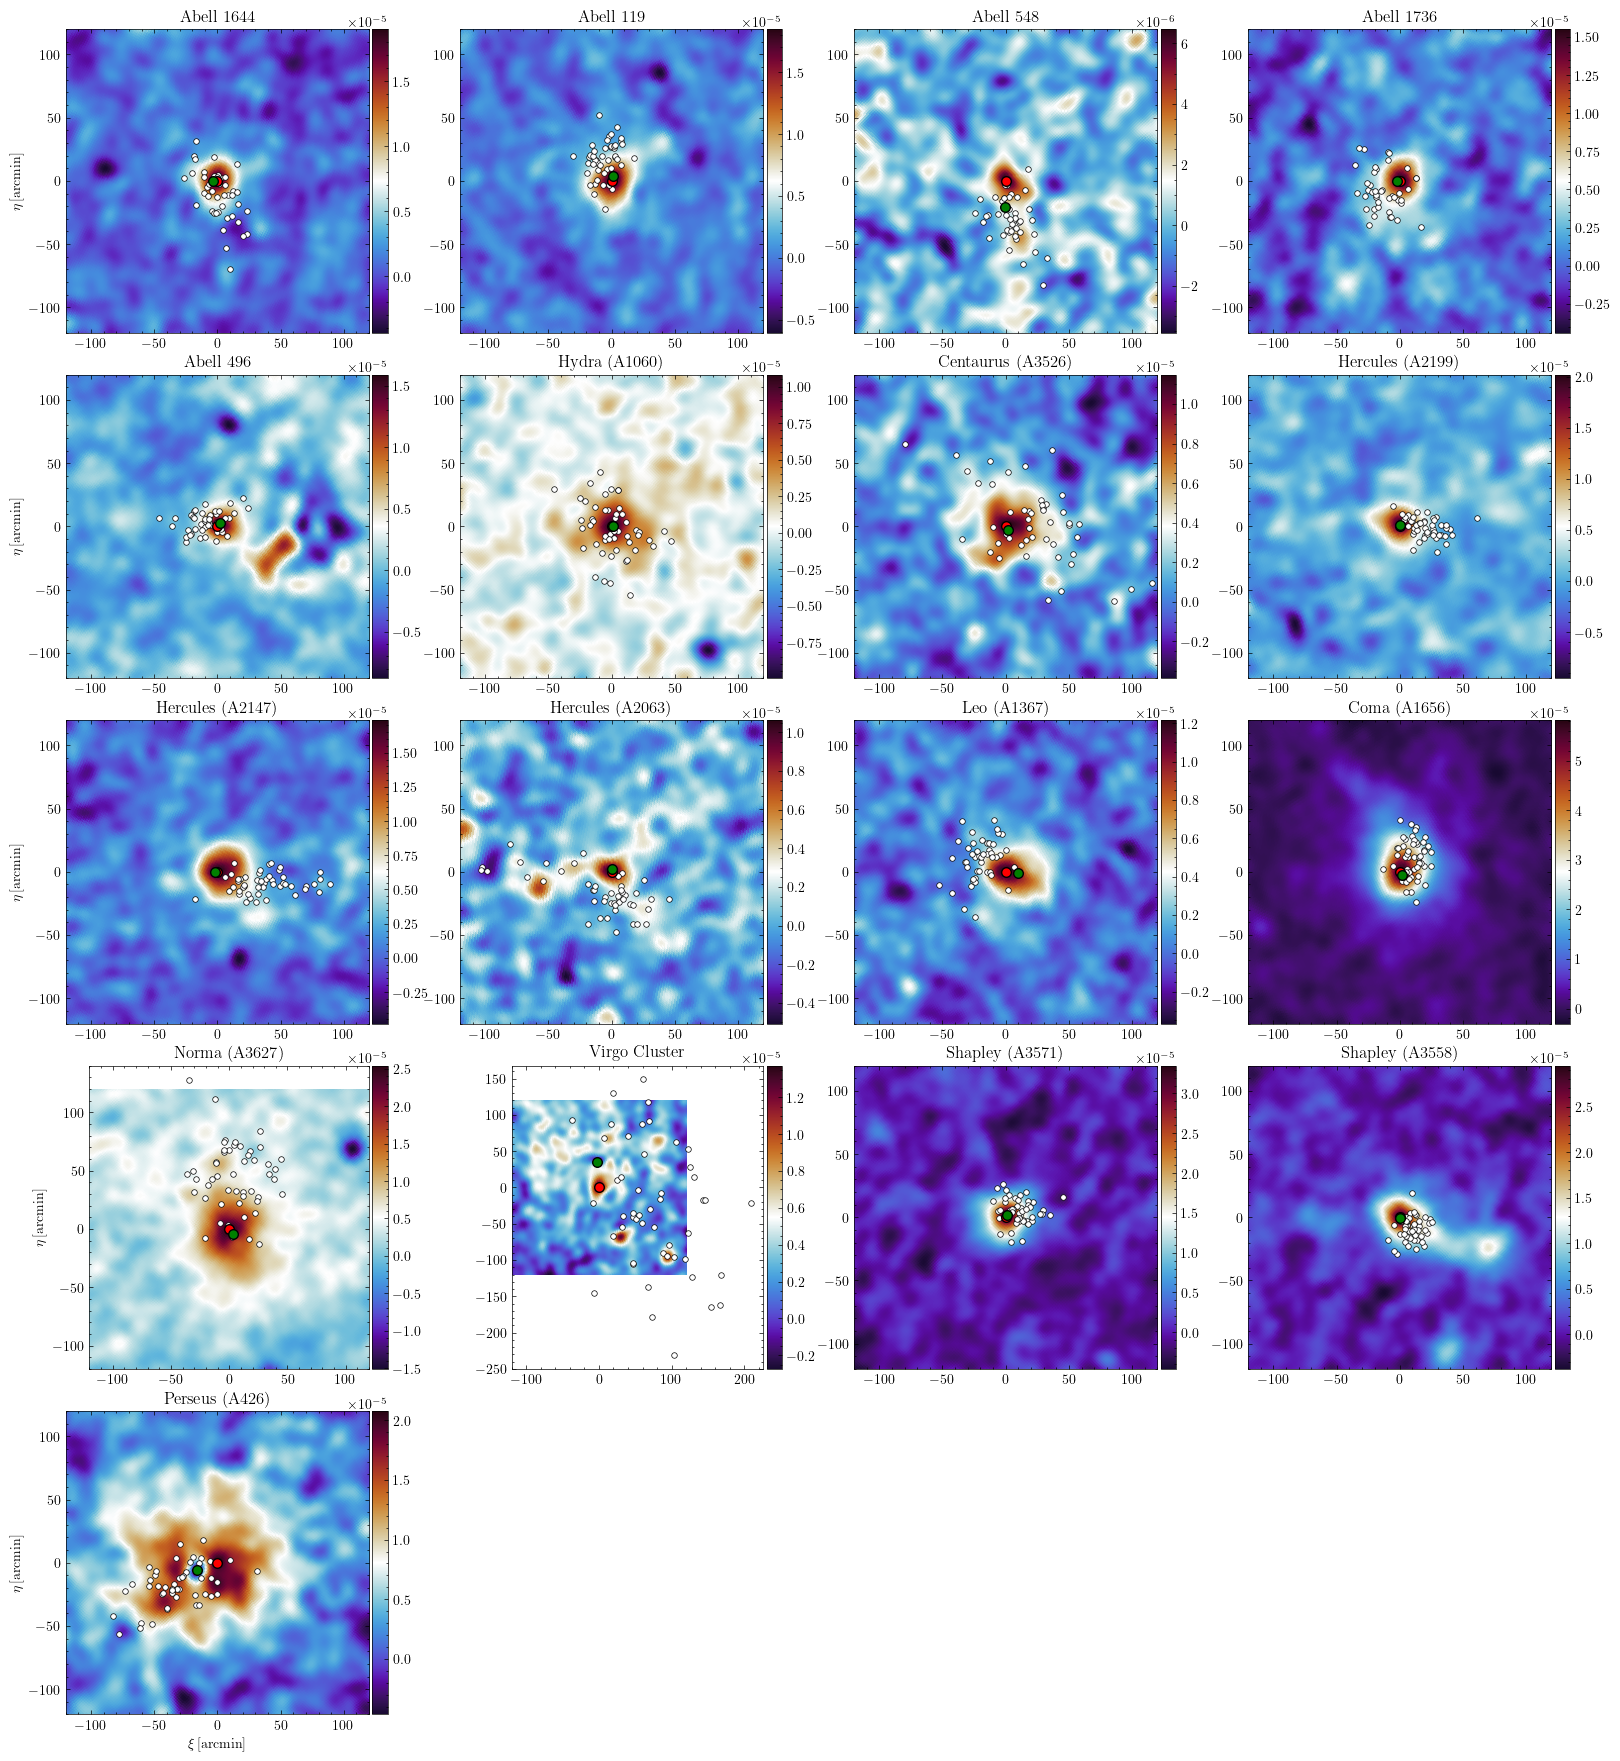

In [35]:
fig, ax = plot_observed_cluster_grid(obs_clusters, matches, boxsize,)


fig.savefig(f"/Users/rstiskalek/Downloads/manticore_grid.png", dpi=450, bbox_inches='tight', pad_inches=0.05)
display(fig)

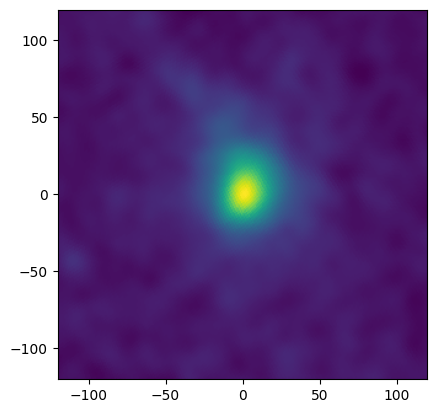

In [ ]:
k = 12

obs = obs_clusters[k]


# The map is centered on:
obs.map_fit["ell"], obs.map_fit["b"]


# Plot on it as a red dot this observed position (tuple of numbers in degrees in galactic)
obs.galactic_coordinates

plt.figure()
plt.imshow(obs.map_fit["cutout"], origin="lower", extent=obs.map_fit["extent"])


plt.show()


In [14]:
obs.map_fit["ell"], obs.map_fit["b"]

(57.08531415929335, 88.00239249385237)

In [251]:
cutout_gen = cmbo.corr.Pointing2DCutout(cmb_tsz, fwhm_arcmin=9.6)

size_arcmin = 180

cut, ext = cutout_gen.get_cutout_2d(ell_deg=ellc, b_deg=bc, size_arcmin=size_arcmin)

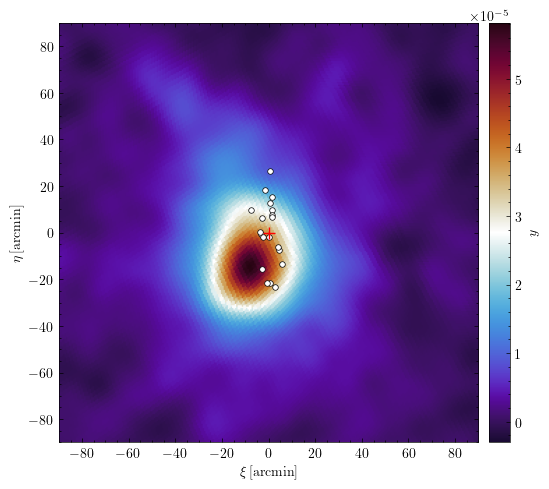

In [252]:
fig, ax = plot_cluster_cutout(cut, ext, ell, b, ellc, bc)

fig.savefig(f"cluster_{obs_clusters.names[k].replace(' ', '_')}.png", dpi=300)

display(fig)
plt.close("all")

In [268]:
profiler = cmbo.corr.PointingEnclosedProfile(cmb_tsz, )

In [269]:
cmbo.utils.compute_association_signals(
    associations, profiler, obs_pos, theta_rand, tsz_rand_signal, theta_rand_bg, tsz_rand_background,
    background_radius_norm=1.25)

Computing association signals: 100%|██████████| 358/358 [01:32<00:00,  3.88it/s]


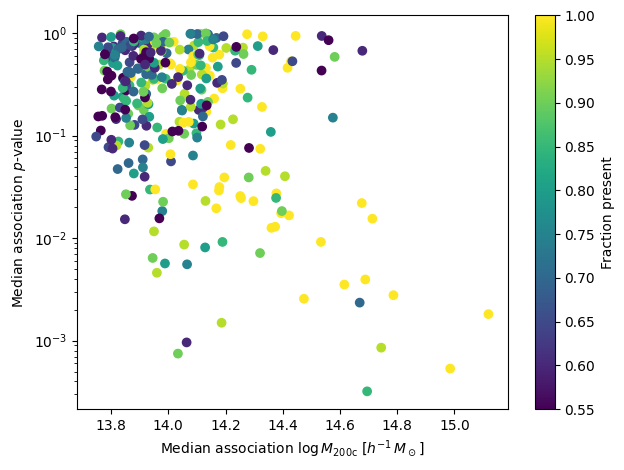

In [273]:
x = np.asanyarray([np.log10(np.median(assoc.masses)) for assoc in associations])
y = np.asanyarray([assoc.median_pval for assoc in associations])
f = np.asanyarray([assoc.fraction_present for assoc in associations])


mask_f = f > 0.5

plt.figure()
plt.scatter(x[mask_f], y[mask_f], c=f[mask_f], cmap="viridis")
plt.colorbar(label="Fraction present")
plt.xlabel(r"Median association $\log M_\mathrm{200c} ~ [h^{-1}\,M_\odot]$")
plt.ylabel("Median association $p$-value")
plt.yscale("log")
plt.tight_layout()

plt.savefig("/Users/rstiskalek/Downloads/association_plot.png", dpi=300)

plt.show()